In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url,parse_dates=['Month'],index_col = 'Month')
df.head(10)

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


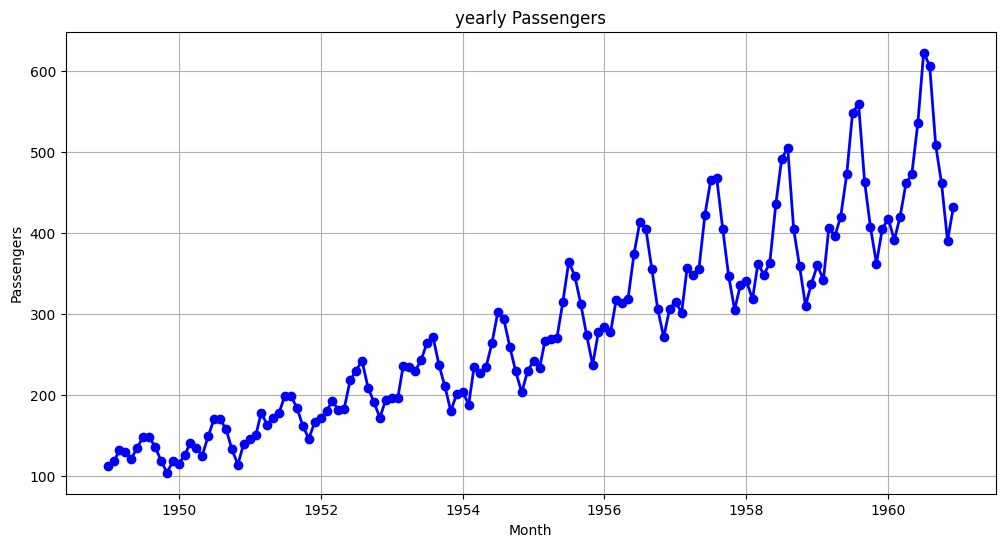

In [ ]:
#creating a line plot
plt.figure(figsize=(12,6))
plt.plot(df,color='blue',marker='o',linestyle='-',linewidth=2,markersize=6)
plt.title('yearly Passengers')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.grid(True)
plt.show()

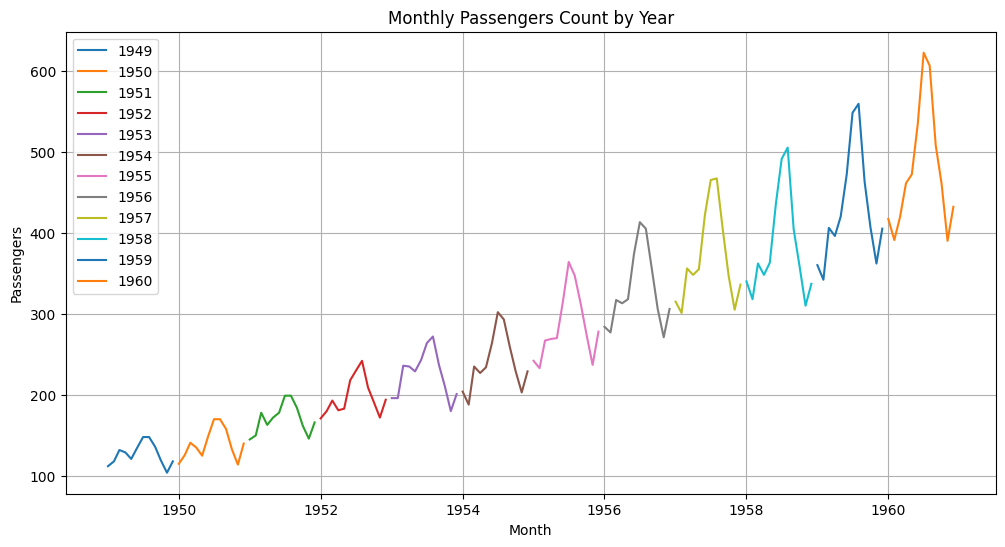

In [ ]:
# Extract years from data
years = df.index.year.unique()

# plotting each year as its own line
plt.figure(figsize=(12,6))
for year in years:
    year_data = df[df.index.year == year]
    plt.plot(year_data['Passengers'], label=year)

plt.title('Monthly Passengers Count by Year')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.legend()
plt.grid(True)
plt.show()

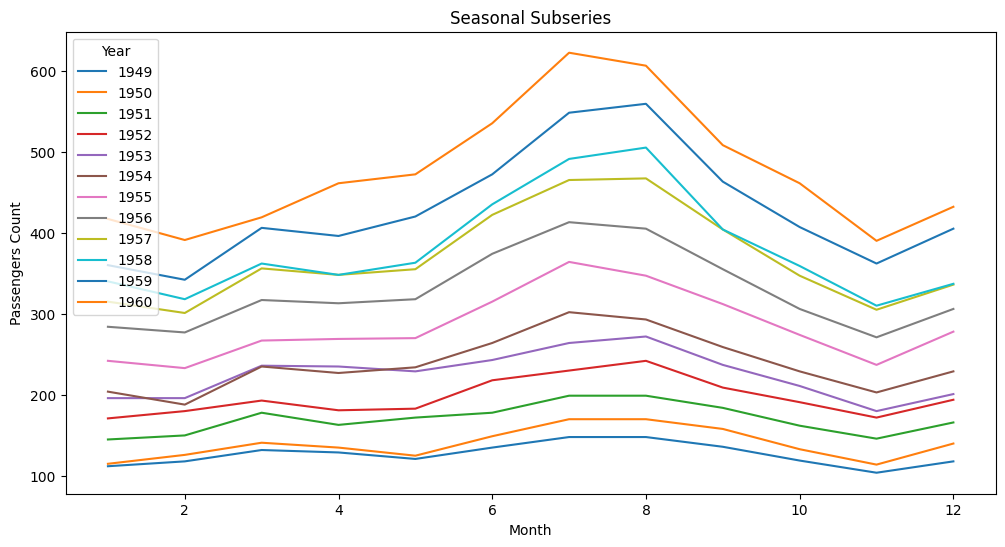

In [ ]:
# Plot seasonal subseries
df['Year'] = df.index.year
df['month'] = df.index.month

# Pivot table
table = pd.pivot_table(df,
                       values='Passengers',
                       index=['month'],
                       columns='Year',
                       aggfunc='sum')

# plot the series
fig, ax = plt.subplots(figsize=(12,6))
table.plot(ax=ax, kind='line', legend=True)
ax.set_xlabel('Month')
ax.set_ylabel('Passengers Count')
ax.set_title('Seasonal Subseries')
plt.show()

/tmp/ipython-input-403027892.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Passengers'], shade=True)


Text(0.5, 0, 'Passengers Count')

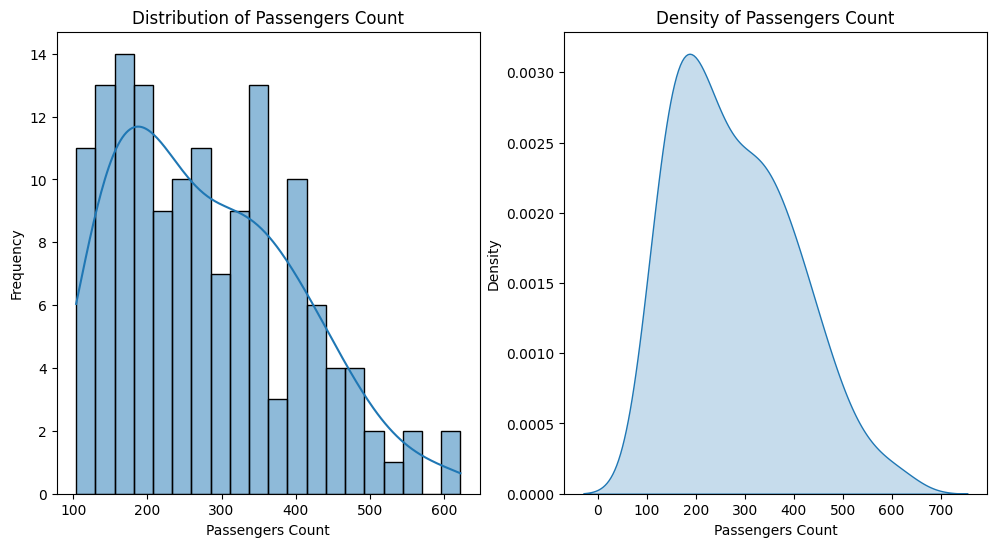

In [ ]:
import seaborn as sns

# histogram
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(df['Passengers'], bins=20, kde=True)
plt.title('Distribution of Passengers Count')
plt.xlabel('Passengers Count')
plt.ylabel('Frequency')

# Density
plt.subplot(1,2,2)
sns.kdeplot(df['Passengers'], shade=True)
plt.title('Density of Passengers Count')
plt.xlabel('Passengers Count')

#**=========== Clase del 20 de octubre ===========**

In [ ]:
df.rename(columns={'Passengers':'y'}, inplace=True)
df.head()

,y,Year,month
Month,,,
1949-01-01,112,1949,1
1949-02-01,118,1949,2
1949-03-01,132,1949,3
1949-04-01,129,1949,4
1949-05-01,121,1949,5


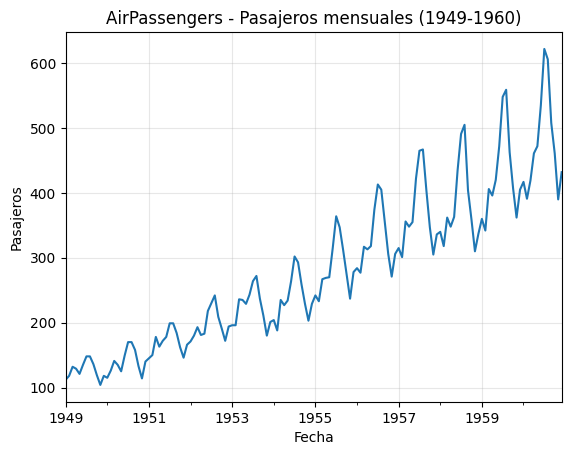

In [ ]:
ax = df['y'].plot()
ax.set_title("AirPassengers - Pasajeros mensuales (1949-1960)")
ax.set_xlabel("Fecha")
ax.set_ylabel("Pasajeros")
ax.grid(True, alpha=0.3)
plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

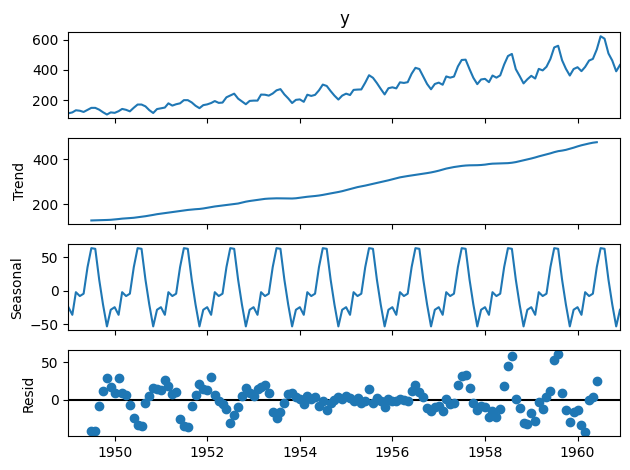

In [ ]:
decomp = seasonal_decompose(df['y'], model="additive", period=12)
decomp.plot()
plt.show()

###**Ejercicio 1.**
Use the Sunspots dataset (https://www.kaggle.com/datasets/robervalt/sunspots)
to demonstrate basic concepts of time series.

In [ ]:
# Authenticate and mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import kagglehub
import os
import seaborn as sns
import pandas as pd
import shutil
import matplotlib.pyplot as plt

# Download latest version of the dataset
path = kagglehub.dataset_download('robervalt/sunspots')

print("Path to dataset files: ", path)

Using Colab cache for faster access to the 'sunspots' dataset.
Path to dataset files:  /kaggle/input/sunspots


In [ ]:
# Define the destination path in Google Drive
drive_path = "/content/drive/MyDrive/AI/Files/"

# Create the directory in Drive if it doesn't exist
os.makedirs(drive_path, exist_ok=True)

# Copy the downloaded files to the specified path in Google Drive
for item in os.listdir(path):
    s = os.path.join(path, item)
    d = os.path.join(drive_path, item)
    if os.path.isdir(s):
        # Use copytree for directories
        shutil.copytree(s, d, dirs_exist_ok=True)
    else:
        # Use copy2 for files
        shutil.copy2(s, d)

print(f"Dataset copied to: {drive_path}")

Dataset copied to: /content/drive/MyDrive/AI/Files/


In [ ]:
# We define the path on our drive fo the dataset
sunspots_path = "/content/drive/MyDrive/AI/Files/Sunspots.csv"

# Load the dataset
sunspots_df = pd.read_csv(sunspots_path,parse_dates=['Date'], index_col='Date')
sunspots_df = sunspots_df.drop(columns=["Unnamed: 0"])
sunspots_df = sunspots_df.rename(columns={'Monthly Mean Total Sunspot Number': 'Sunspots'})

# Display a few rows
print("Primeras filas del dataset:")
sunspots_df.head(10)

Primeras filas del dataset:


,Sunspots
Date,
1749-01-31,96.7
1749-02-28,104.3
1749-03-31,116.7
1749-04-30,92.8
1749-05-31,141.7
1749-06-30,139.2
1749-07-31,158.0
1749-08-31,110.5
1749-09-30,126.5


In [ ]:
# Summary of missing values
print("\nResumen de valores faltantes:")
print(sunspots_df.isnull().sum())


Resumen de valores faltantes:
Sunspots    0
dtype: int64


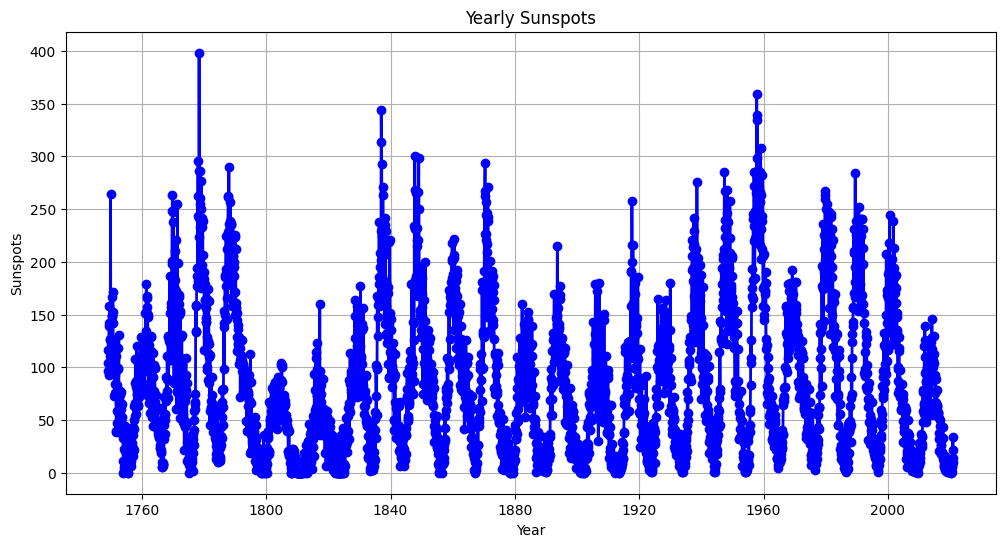

In [ ]:
# Create the first line plot
plt.figure(figsize=(12,6))
plt.plot(sunspots_df,color='blue',marker='o',linestyle='-',linewidth=2,markersize=6)
plt.title('Yearly Sunspots')
plt.xlabel('Year')
plt.ylabel('Sunspots')
plt.grid(True)
plt.show()

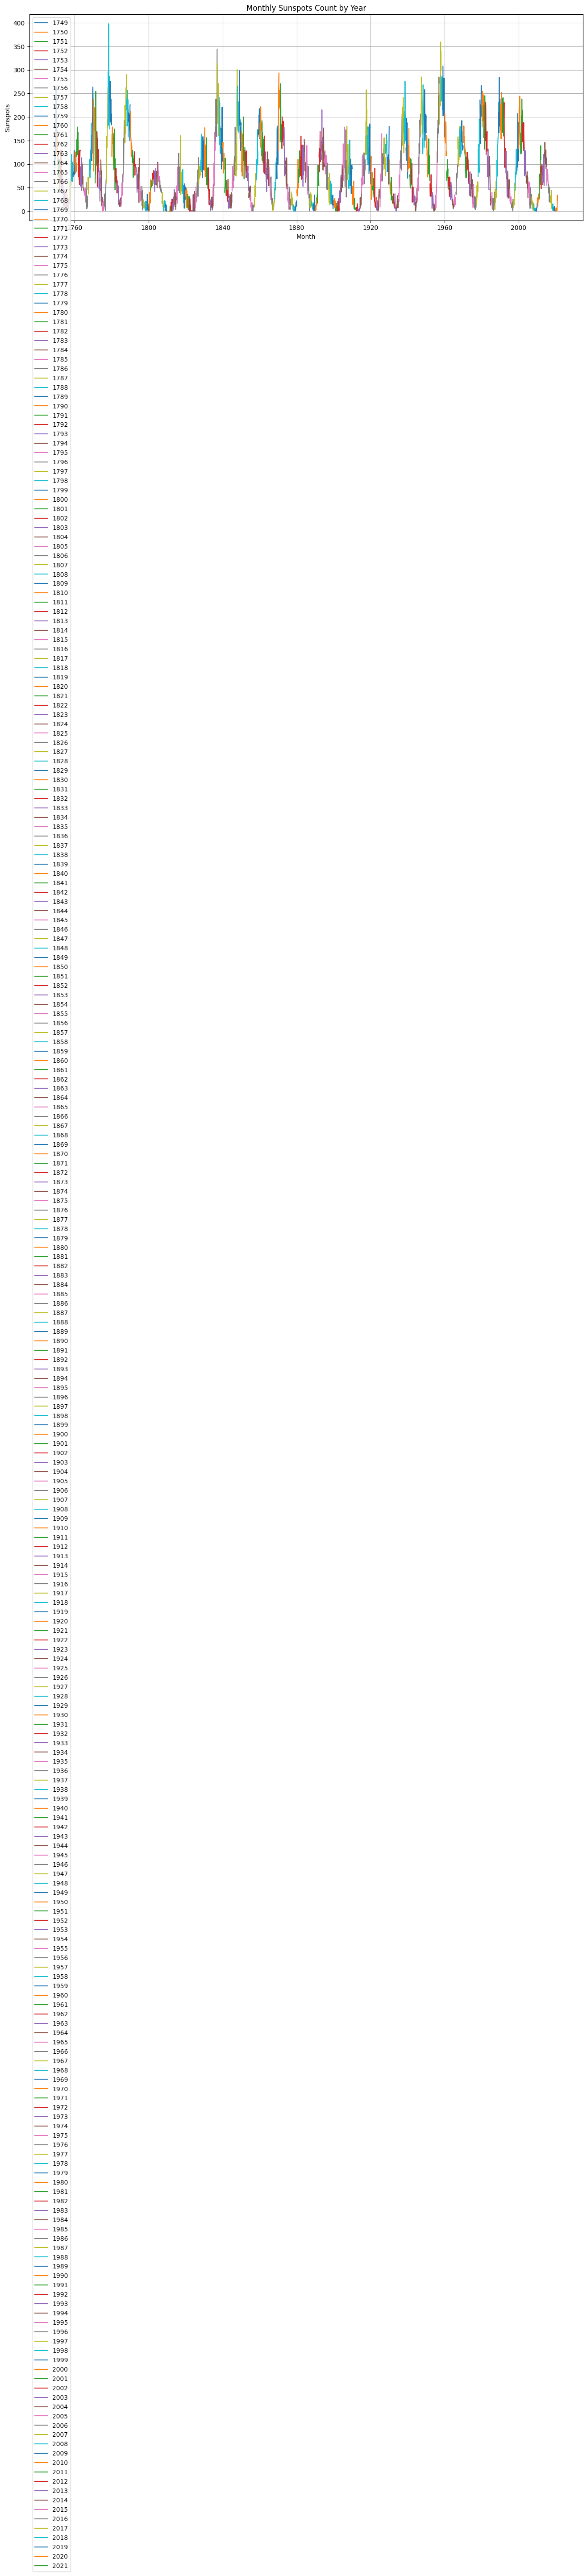

In [ ]:
# extract years from data
years = sunspots_df.index.year.unique()

# plotting each year as its own line
plt.figure(figsize=(16,6))
for year in years:
    year_data = sunspots_df[sunspots_df.index.year == year]
    plt.plot(year_data['Sunspots'], label=year)

plt.title('Monthly Sunspots Count by Year')
plt.xlabel('Month')
plt.ylabel('Sunspots')
plt.legend()
plt.grid(True)
plt.show()

# Aquí se distorsiona un poco la gráfica porque tenemos demasiados años en nuestro dataset

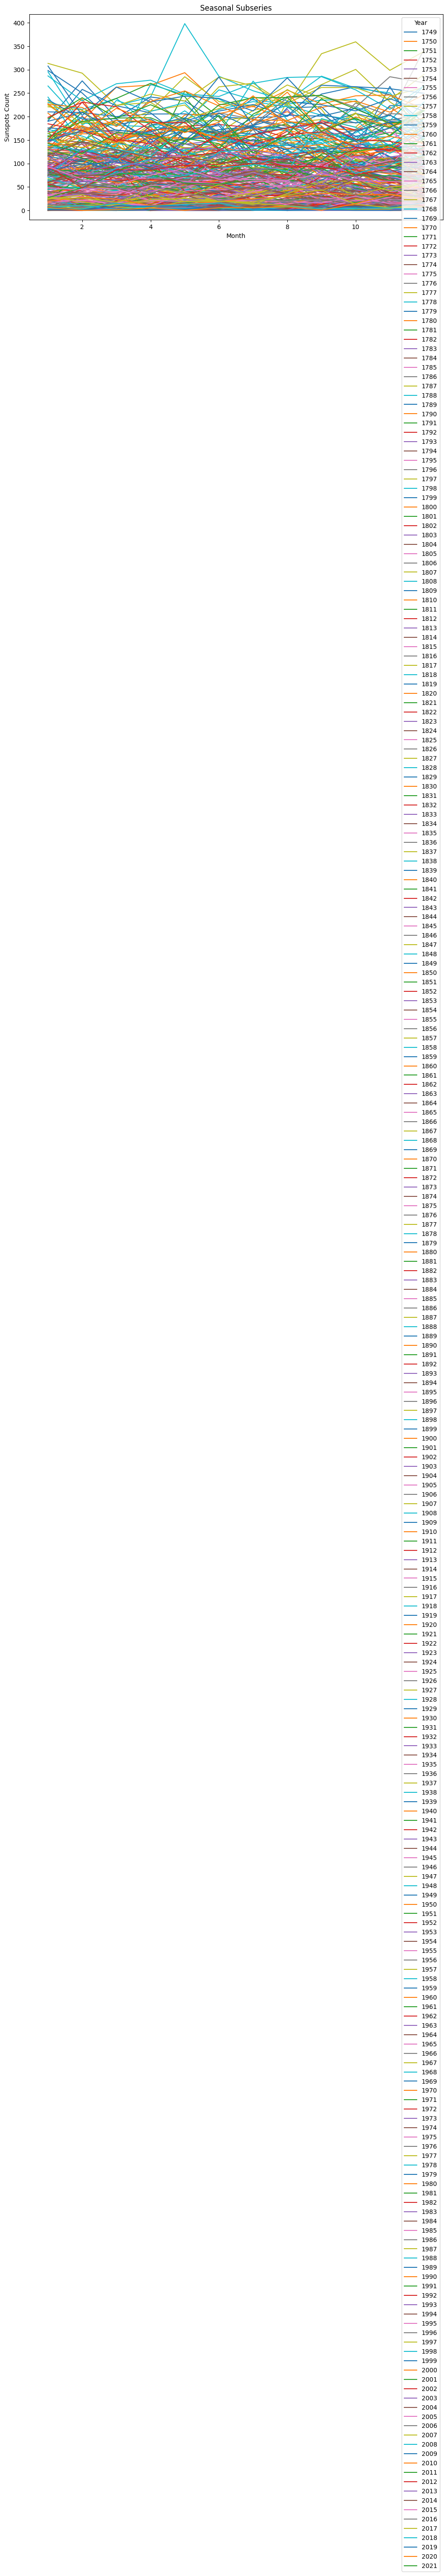

In [ ]:
# Plot seasonal subseries
sunspots_df['Year'] = sunspots_df.index.year
sunspots_df['month'] = sunspots_df.index.month

# Pivot table
table = pd.pivot_table(sunspots_df,
                       values='Sunspots',
                       index=['month'],
                       columns='Year',
                       aggfunc='sum')

# plot the series
fig, ax = plt.subplots(figsize=(12,6))
table.plot(ax=ax, kind='line', legend=True)
ax.set_xlabel('Month')
ax.set_ylabel('Sunspots Count')
ax.set_title('Seasonal Subseries')
plt.show()

/tmp/ipython-input-1126242214.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sunspots_df['Sunspots'], shade=True)


Text(0.5, 0, 'Sunspots Count')

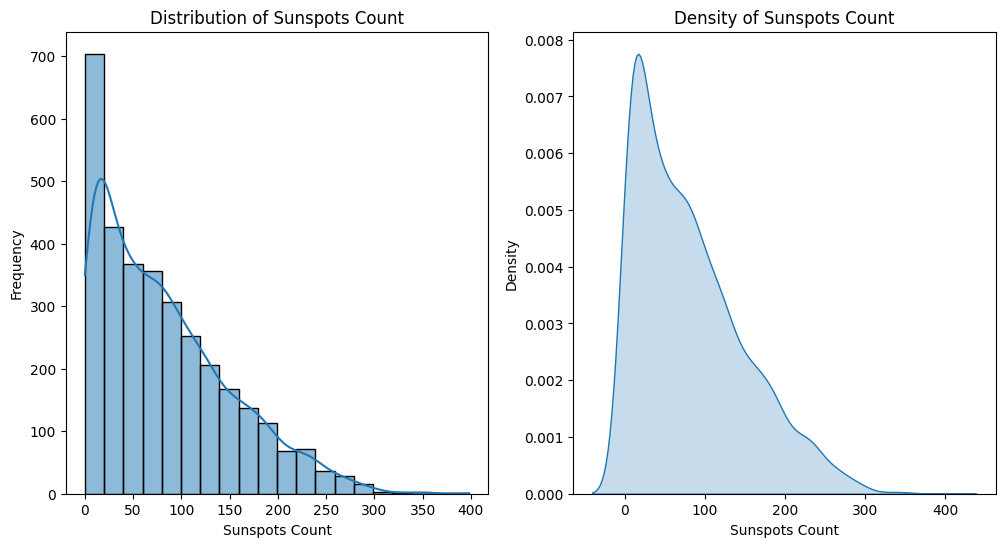

In [ ]:
import seaborn as sns

# histogram
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(sunspots_df['Sunspots'], bins=20, kde=True)
plt.title('Distribution of Sunspots Count')
plt.xlabel('Sunspots Count')
plt.ylabel('Frequency')

# Density
plt.subplot(1,2,2)
sns.kdeplot(sunspots_df['Sunspots'], shade=True)
plt.title('Density of Sunspots Count')
plt.xlabel('Sunspots Count')

###**Ejercicio 2**
Use the Unemployment in America dataset
(https://www.kaggle.com/datasets/justin2028/unemployment-in-america-per-us-state)

In [ ]:
# Authenticate and mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import kagglehub
import os
import seaborn as sns
import pandas as pd
import shutil
import matplotlib.pyplot as plt

# Download latest version of the dataset
path = kagglehub.dataset_download('justin2028/unemployment-in-america-per-us-state')

print("Path to dataset files: ", path)

Using Colab cache for faster access to the 'unemployment-in-america-per-us-state' dataset.
Path to dataset files:  /kaggle/input/unemployment-in-america-per-us-state


In [ ]:
# Define the destination path in Google Drive
drive_path = "/content/drive/MyDrive/AI/Files/"

# Create the directory in Drive if it doesn't exist
os.makedirs(drive_path, exist_ok=True)

# Copy the downloaded files to the specified path in Google Drive
for item in os.listdir(path):
    s = os.path.join(path, item)
    d = os.path.join(drive_path, item)
    if os.path.isdir(s):
        # Use copytree for directories
        shutil.copytree(s, d, dirs_exist_ok=True)
    else:
        # Use copy2 for files
        shutil.copy2(s, d)

print(f"Dataset copied to: {drive_path}")

Dataset copied to: /content/drive/MyDrive/AI/Files/


In [ ]:
import pandas as pd

# We define the path on our drive fo the dataset
unemploymentInUSA_path = "/content/drive/MyDrive/AI/Files/Unemployment in America Per US State.csv"

# # Load the dataset
unemploymentInUSA_df = pd.read_csv(unemploymentInUSA_path)

# Convert 'Total Unemployment in State/Area' to numeric by removing commas
unemploymentInUSA_df['Total Unemployment in State/Area'] = unemploymentInUSA_df['Total Unemployment in State/Area'].str.replace(',', '', regex=False).astype(float)


# Display a few rows
print("Primeras filas del dataset:")
display(unemploymentInUSA_df.head(10))

Primeras filas del dataset:


,FIPS Code,State/Area,Year,Month,Total Civilian Non-Institutional Population in State/Area,Total Civilian Labor Force in State/Area,Percent (%) of State/Area's Population,Total Employment in State/Area,Percent (%) of Labor Force Employed in State/Area,Total Unemployment in State/Area,Percent (%) of Labor Force Unemployed in State/Area
0,1,Alabama,1976,1,"2,605,000","1,484,555",57.0,"1,386,023",53.2,98532.0,6.6
1,2,Alaska,1976,1,"232,000","160,183",69.0,"148,820",64.1,11363.0,7.1
2,4,Arizona,1976,1,"1,621,000","964,120",59.5,"865,871",53.4,98249.0,10.2
3,5,Arkansas,1976,1,"1,536,000","889,044",57.9,"824,395",53.7,64649.0,7.3
4,6,California,1976,1,"15,621,000","9,774,280",62.6,"8,875,685",56.8,898595.0,9.2
5,37,Los Angeles County,1976,1,"5,273,000","3,381,856",64.1,"3,081,806",58.4,300050.0,8.9
6,8,Colorado,1976,1,"1,832,000","1,230,966",67.2,"1,160,104",63.3,70862.0,5.8
7,9,Connecticut,1976,1,"2,248,000","1,442,847",64.2,"1,301,974",57.9,140873.0,9.8
8,10,Delaware,1976,1,"417,000","261,418",62.7,"240,543",57.7,20875.0,8.0
9,11,District of Columbia,1976,1,"520,000","334,691",64.4,"305,677",58.8,29014.0,8.7


In [ ]:
# Summary of missing values
print("\nResumen de valores faltantes:")
print(unemploymentInUSA_df.isnull().sum())


Resumen de valores faltantes:
FIPS Code                                                    0
State/Area                                                   0
Year                                                         0
Month                                                        0
Total Civilian Non-Institutional Population in State/Area    0
Total Civilian Labor Force in State/Area                     0
Percent (%) of State/Area's Population                       0
Total Employment in State/Area                               0
Percent (%) of Labor Force Employed in State/Area            0
Total Unemployment in State/Area                             0
Percent (%) of Labor Force Unemployed in State/Area          0
dtype: int64


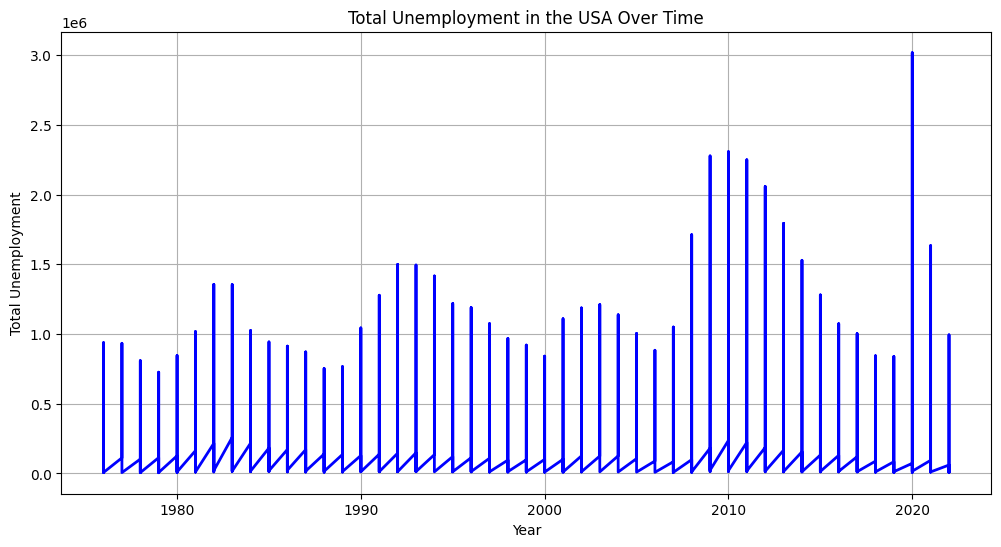

In [ ]:
# Creating a line plot for the total unemployment in the USA over time
plt.figure(figsize=(12,6))
plt.plot(unemploymentInUSA_df['Year'], unemploymentInUSA_df['Total Unemployment in State/Area'], color='blue', linestyle='-', linewidth=2)
plt.title('Total Unemployment in the USA Over Time')
plt.xlabel('Year')
plt.ylabel('Total Unemployment')
plt.grid(True)
plt.show()

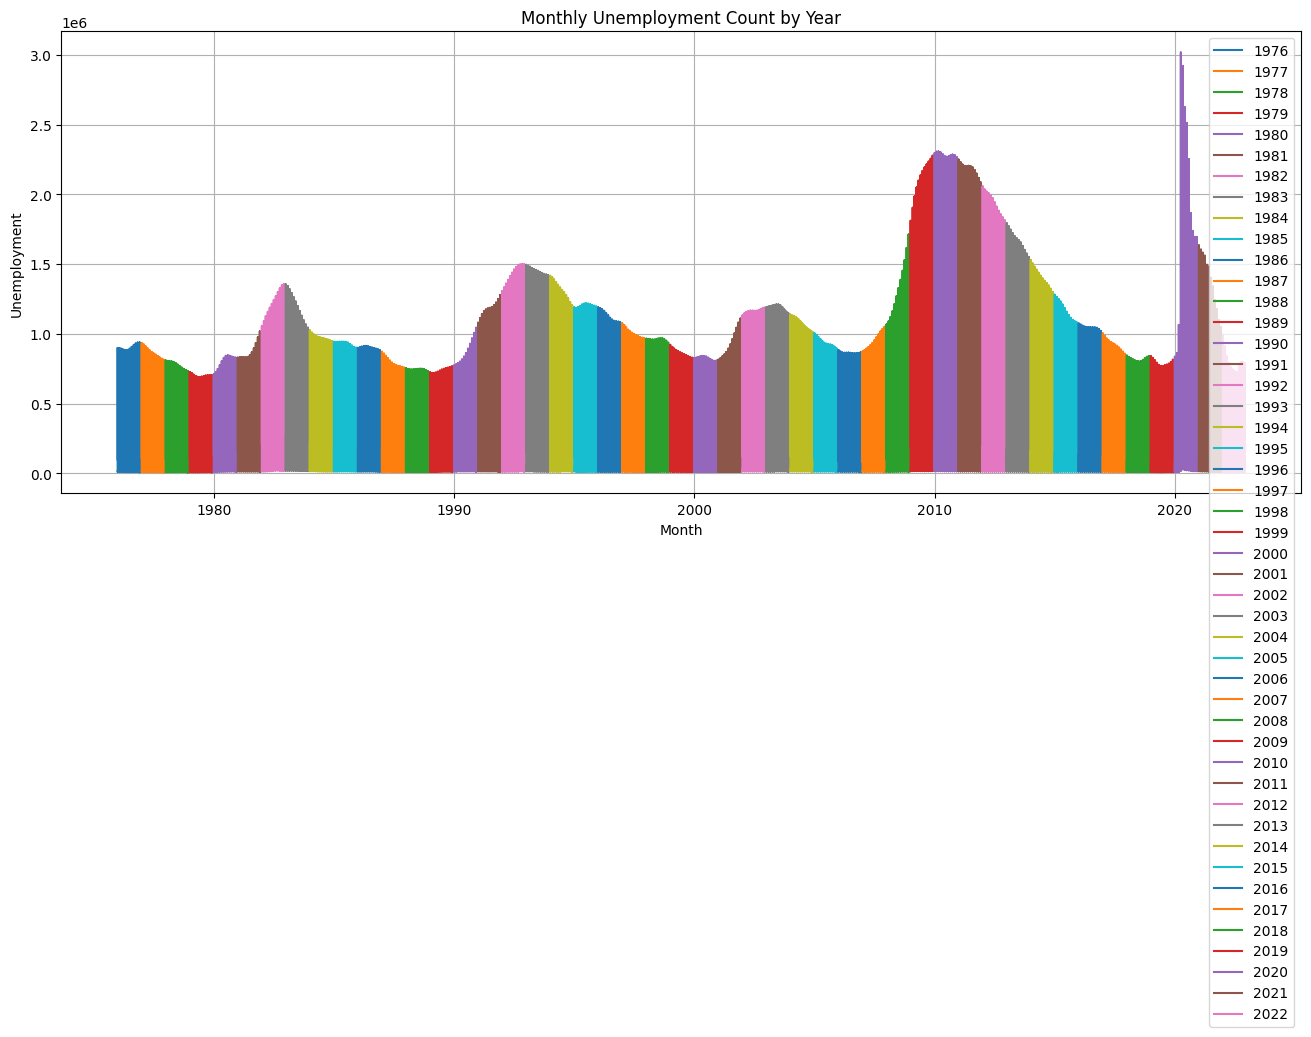

In [ ]:
# Create a datetime index from 'Year' and 'Month' columns
unemploymentInUSA_df['Date'] = pd.to_datetime(unemploymentInUSA_df['Year'].astype(str) + '-' + unemploymentInUSA_df['Month'].astype(str))
unemploymentInUSA_df = unemploymentInUSA_df.set_index('Date')

# extract years from data
years = unemploymentInUSA_df.index.year.unique()

# plotting each year as its own line
plt.figure(figsize=(16,6))
for year in years:
    year_data = unemploymentInUSA_df[unemploymentInUSA_df.index.year == year]
    plt.plot(year_data['Total Unemployment in State/Area'], label=year)

plt.title('Monthly Unemployment Count by Year')
plt.xlabel('Month')
plt.ylabel('Unemployment')
plt.legend()
plt.grid(True)
plt.show()

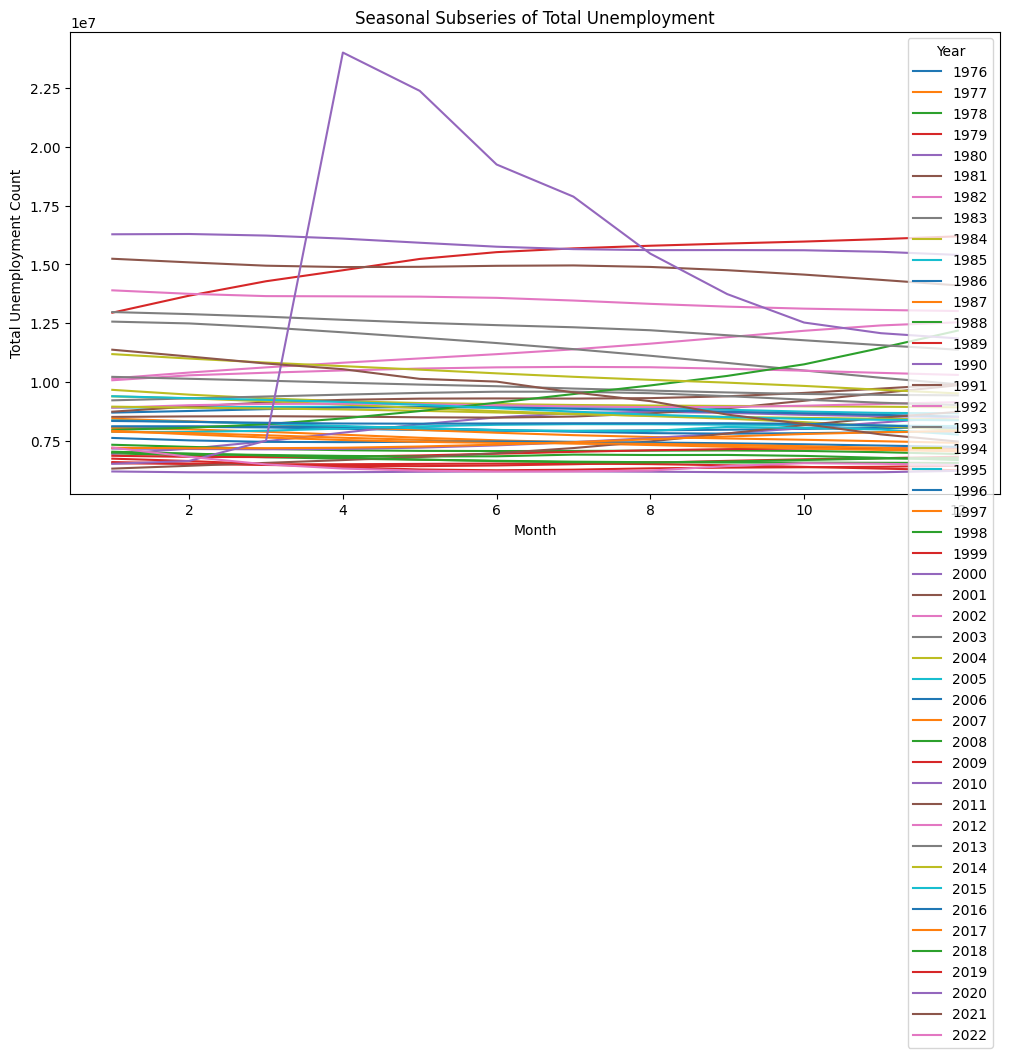

In [ ]:
# Plot seasonal subseries for the total unemployment in the USA
unemploymentInUSA_df['Month'] = unemploymentInUSA_df['Month']

# Pivot table
table_unemployment = pd.pivot_table(unemploymentInUSA_df,
                       values='Total Unemployment in State/Area',
                       index=['Month'],
                       columns='Year',
                       aggfunc='sum')

# plot the series
fig, ax = plt.subplots(figsize=(12,6))
table_unemployment.plot(ax=ax, kind='line', legend=True)
ax.set_xlabel('Month')
ax.set_ylabel('Total Unemployment Count')
ax.set_title('Seasonal Subseries of Total Unemployment')
plt.show()

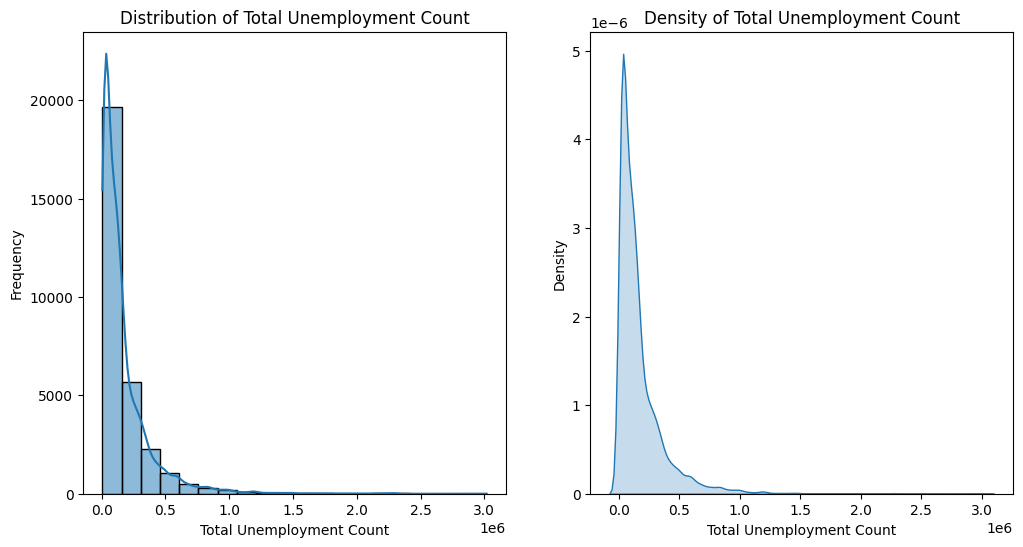

In [ ]:
# histogram of Total Unemployment
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(unemploymentInUSA_df['Total Unemployment in State/Area'], bins=20, kde=True)
plt.title('Distribution of Total Unemployment Count')
plt.xlabel('Total Unemployment Count')
plt.ylabel('Frequency')

# Density of Total Unemployment
plt.subplot(1,2,2)
sns.kdeplot(unemploymentInUSA_df['Total Unemployment in State/Area'], fill=True)
plt.title('Density of Total Unemployment Count')
plt.xlabel('Total Unemployment Count')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
np.random.seed(42)
plt.rcParams['figure.figsize'] = (10, 4)

In [ ]:

def plot_series(s, title):
  s.plot()
  plt.title(title)
  plt.xlabel("Time")
  plt.ylabel("Value")
  plt.grid(True)
  plt.show()

def adf_test(x):
  res = adfuller(x, autolag="AIC")
  keys = ['test_stat', 'pvalue', 'lags', 'n_obs', 'critical_values', 'icbest']
  return dict(zip(keys, [res[0], res[1], res[2], res[3], res[4], res[5]]))

def kpss_test(x, regression='c', nlags="auto"):
  stat, pval, lags, crit = kpss(x, regression=regression, nlags=nlags)
  return {"test__stat": stat,
          "pvalue": pval,
          "lags": lags,
          "critical_values": crit,
          "regression": regression}

def print_test(x, name="series"):
  print(f"Test {name}")
  a = adf_test(x)
  print(f"ADF Statistic: {a['test_stat']:.3f} p={a['pvalue']}")
  try:
    k = kpss_test(x)
    print(f"KPSS: stat={k['test_stat']:.3f} p={k['pvalue']}")
  except:
    print("KPSS not available")

def rolling_mean_var(s, window=24, title="Rolling Mean & Var"):
  rolling_mean = s.rolling(window).mean()
  rolling_var = s.rolling(window).var()
  fig, ax = plt.subplots(2, 1, figsize=(10, 6))
  ax[0].plot(s, label="Original")
  ax[0].plot(rolling_mean, label="Rolling Mean")
  ax[0].legend()
  ax[0].set_title(title + "- mean")
  ax[1].plot(rolling_var, label="Rolling Var")
  ax[1].legend()
  ax[1].set_title(title + "- var")
  plt.show()

In [ ]:
n = 240 # months
t = np.arange(n)

# Stationary: white noise
white_noise = pd.Series(np.random.normal(0, 1, n))

# Non-Stationary
trend = 0.02 * t
trended = pd.Series(trend + np.random.normal(0, 1, n))

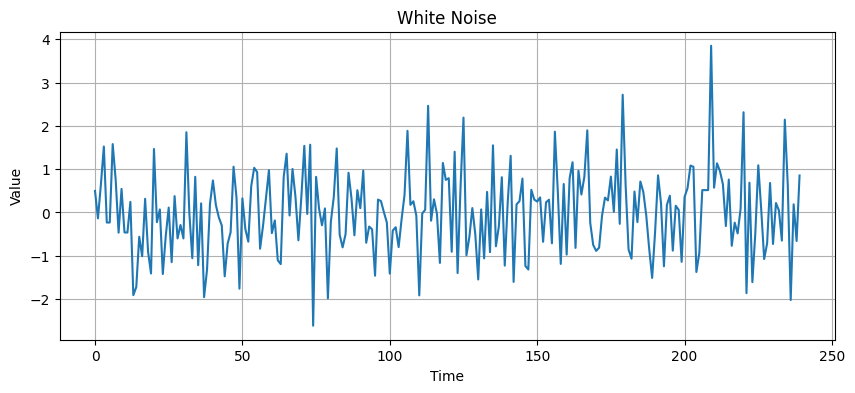

Test White Noise
ADF Statistic: -16.112 p=5.006520467194035e-29
KPSS not available


/tmp/ipython-input-255179598.py:15: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  stat, pval, lags, crit = kpss(x, regression=regression, nlags=nlags)


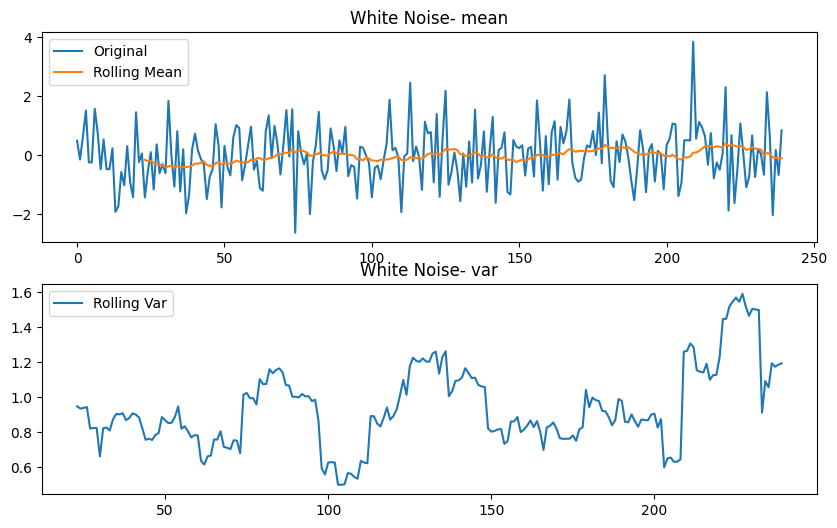

In [ ]:
plot_series(white_noise, "White Noise")
print_test(white_noise, "White Noise")
rolling_mean_var(white_noise, window=24, title="White Noise")

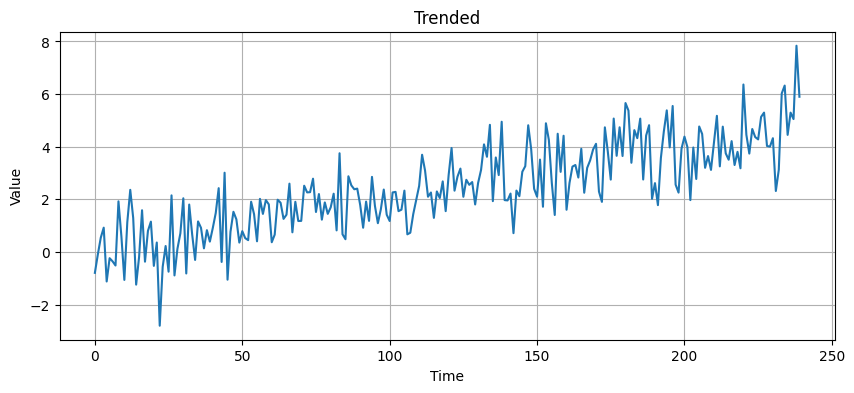

Test Trended
ADF Statistic: -0.057 p=0.9535945013089667
KPSS not available


/tmp/ipython-input-255179598.py:15: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  stat, pval, lags, crit = kpss(x, regression=regression, nlags=nlags)


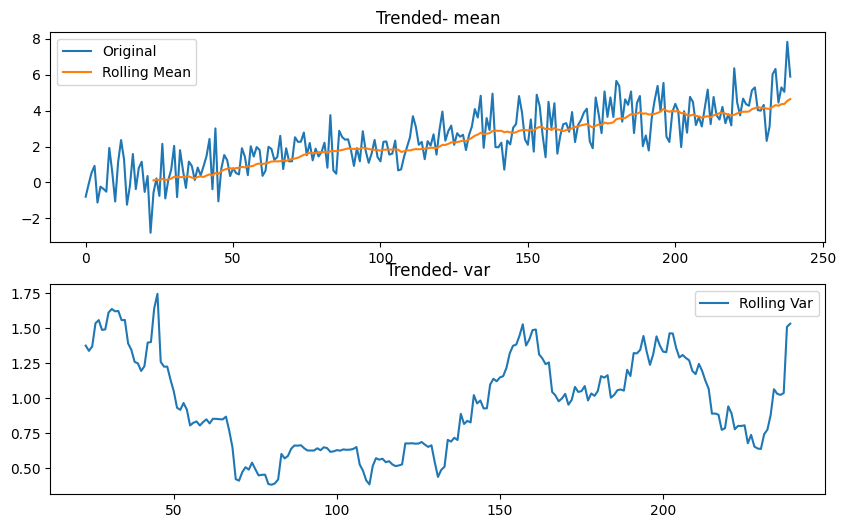

In [ ]:
plot_series(trended, "Trended")
print_test(trended, "Trended")
rolling_mean_var(trended, window=24, title="Trended")

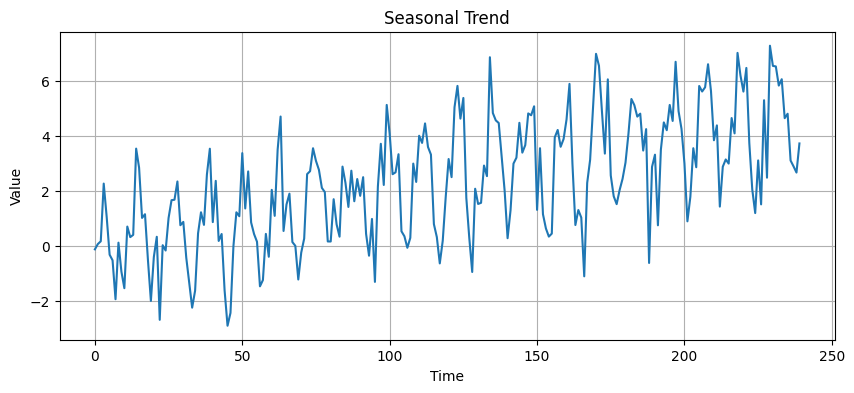

Test Seasonal Trend
ADF Statistic: -0.530 p=0.8860859361543622
KPSS not available


/tmp/ipython-input-255179598.py:15: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  stat, pval, lags, crit = kpss(x, regression=regression, nlags=nlags)


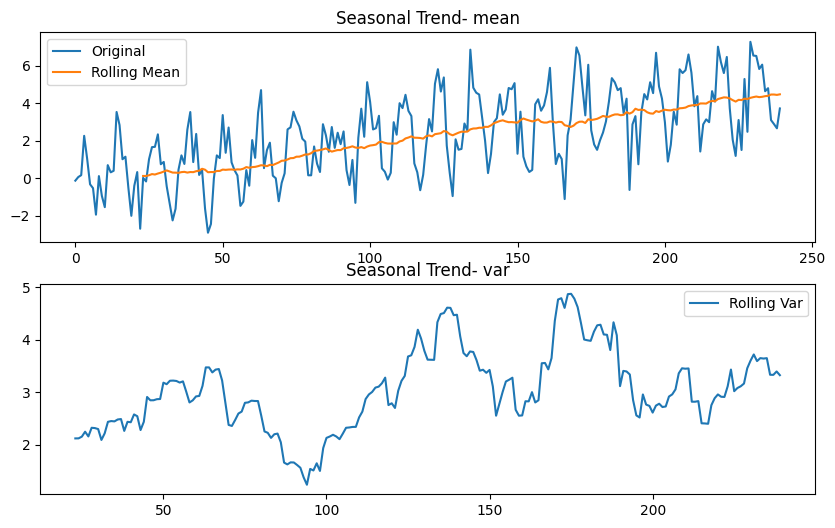

In [ ]:
# Seasonal + trend
seasonal = 2 * np.sin(2*np.pi*t/12)
trend = 0.02 * t
season_trend = pd.Series(trend + seasonal + np.random.normal(0, 1, n))
plot_series(season_trend, "Seasonal Trend")
print_test(season_trend, "Seasonal Trend")
rolling_mean_var(season_trend, window=24, title="Seasonal Trend")